# Projet Steam

### La plateforme de jeux vidéo de Steam 


#### Description de l'entreprise 
Steam est un service de distribution numérique de jeux vidéo et une boutique en ligne de Valve . Lancé en septembre 2003, il automatise les mises à jour des jeux Valve et s'étend à la distribution de titres tiers fin 2005. Steam propose diverses fonctionnalités, telles que la gestion des droits numériques (DRM), la mise en relation des serveurs de jeu avec les mesures anti-triche de Valve , les réseaux sociaux et le streaming de jeux . Parmi les fonctionnalités du client Steam figurent l'automatisation des mises à jour, le stockage cloud de la progression et des fonctionnalités communautaires telles que la messagerie directe, les fonctions de superposition en jeu et un marché virtuel d'objets de collection .

#### Projet 
Vous travaillez chez Ubisoft , un éditeur français de jeux vidéo. Ils souhaitent sortir un nouveau jeu vidéo révolutionnaire ! Ils vous ont demandé de réaliser une analyse globale des jeux disponibles sur la marketplace Steam afin de mieux comprendre l'écosystème du jeu vidéo et les tendances actuelles.

####Objectifs 
L'objectif ultime de ce projet est de comprendre les facteurs qui influencent la popularité ou les ventes d'un jeu vidéo. Votre patron vous a demandé de profiter de cette occasion pour analyser le marché mondial du jeu vidéo.

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.functions import *
from pyspark.sql.types import ArrayType, StructType, StringType, BooleanType



In [0]:
filepath = "s3://full-stack-bigdata-datasets/Big_Data/Project_Steam/steam_game_output.json"

In [0]:
steam_df = (spark.read.format('json')
           .load(filepath))

In [0]:
print(steam_df.columns)


['data', 'id']


In [0]:
num_rows = steam_df.count()
num_columns = len(steam_df.columns)

print(f"Row = {num_rows}, Column = {num_columns}")

Row = 55691, Column = 2


# Visualisation des colonnes imbriquées

In [0]:
steam_df.printSchema()

root
 |-- data: struct (nullable = true)
 |    |-- appid: long (nullable = true)
 |    |-- categories: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- ccu: long (nullable = true)
 |    |-- developer: string (nullable = true)
 |    |-- discount: string (nullable = true)
 |    |-- genre: string (nullable = true)
 |    |-- header_image: string (nullable = true)
 |    |-- initialprice: string (nullable = true)
 |    |-- languages: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- negative: long (nullable = true)
 |    |-- owners: string (nullable = true)
 |    |-- platforms: struct (nullable = true)
 |    |    |-- linux: boolean (nullable = true)
 |    |    |-- mac: boolean (nullable = true)
 |    |    |-- windows: boolean (nullable = true)
 |    |-- positive: long (nullable = true)
 |    |-- price: string (nullable = true)
 |    |-- publisher: string (nullable = true)
 |    |-- release_date: string (nullable = true)
 |    |-

# Transformation df structure imbriquée 'Data'et 'platforms' en un df colonnes "plates".


In [0]:
steam_df_flat = steam_df.select("data.*", "data.platforms.*")
steam_df_flat = steam_df_flat.drop("platforms")
steam_df_flat.display()

appid categories ccu developer discount genre header_image initialprice languages name negative owners positive price publisher release_date required_age short_description tags type website linux mac windows 10 List(Multi-player, Valve Anti-Cheat enabled, Online PvP, Shared/Split Screen PvP, PvP) 13990 Valve 0 Action https://cdn.akamai.steamstatic.com/steam/apps/10/header.jpg?t=1666823513 999 English, French, German, Italian, Spanish - Spain, Simplified Chinese, Traditional Chinese, Korean Counter-Strike 5199 10,000,000 .. 20,000,000 201215 999 Valve 2000/11/1 0 Play the world's number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your team's success. Your team's success affects your role. List(266, 1191, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, 5426, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, 227, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, 2784, null, null, null, null, null, null, null, null, null, null, null, null, 1607, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, 4831, null, null, null, null, null, null, null, null, null, 1707, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, 632, null, null, null, null, null, null, null, null, null, null, null, 3392, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, 131, null, null, 769, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, 881, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, 289, null, null, null, 3353, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, 614, null, null, null, null, null, null, 304, null, null, null, 1344, null, null, 1864, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, 1192) game true true true 1000000 List(Single-player, Partial Controller Support, Steam Achievements, Steam Cloud) 0 IndigoBlue Game Studio 0 Action, Adventure, Indie https://cdn.akamai.steamstatic.com/steam/apps/1000000/header.jpg?t=1655723048 999 English, Korean, Simplified Chinese ASCENXION 5 0 .. 20,000 27 999 PsychoFlux Entertainment 2021/05/14 0 ASCENXION is a 2D shoot 'em up game where you explore the field to progress. Players must overcome puzzles, traps, elite unit

In [0]:
steam_df_flat.describe().toPandas()

summary 
 appid 
 ccu 
 developer 
 discount 
 genre 
 header_image 
 initialprice 
 languages 
 name 
 negative 
 owners 
 positive 
 price 
 publisher 
 release_date 
 required_age 
 short_description 
 type 
 website 
 
 
 
 
 0 
 count 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 55691 
 
 
 1 
 mean 
 1025603.0926720655 
 138.9596164550825 
 67392.0 
 2.603777989262179 
 None 
 None 
 797.5663033524268 
 None 
 Infinity 
 241.8376937027527 
 None 
 1470.8755992889335 
 773.2849832109317 
 2001.0 
 None 
 0.1978882344490734 
 None 
 None 
 None 
 
 
 2 
 stddev 
 522784.96832834504 
 6002.067909130765 
 210681.70504552333 
 12.887080174743176 
 None 
 None 
 1104.762477841338 
 None 
 NaN 
 5765.413761559615 
 None 
 30982.733479534887 
 1093.13458272345 
 1921.8937275510318 
 None 
 2.2962924614818236 
 None 
 None 
 None 
 
 
 3 
 min 
 10 
 0 
 
 0 
 
 https://cdn.akamai.steamstatic.com/steam/apps/... 
 0 
 
 Fieldrunners 2 
 0 
 0 .. 20,000 
 0 
 0 
 
 
 0 
 
 game 
 
 
 
 4 
 max 
 2190950 
 874053 
 ＼上／ 
 90 
 Web Publishing 
 https://cdn.akamai.steamstatic.com/steam/apps/... 
 9999 
 Turkish 
 ～Daydream～蝶が舞う頃に 
 908515 
 500,000 .. 1,000,000 
 5943345 
 9999 
 Ｌｅｍｏｎ　Ｂａｌｍ 
 2022/11/7 
 MA 15+ 
 🚗 Take part in a roller coaster of emotions wi... 
 hardware 
 www.windybeard.com

In [0]:
steam_df_flat.printSchema()

root
 |-- appid: long (nullable = true)
 |-- categories: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ccu: long (nullable = true)
 |-- developer: string (nullable = true)
 |-- discount: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- header_image: string (nullable = true)
 |-- initialprice: string (nullable = true)
 |-- languages: string (nullable = true)
 |-- name: string (nullable = true)
 |-- negative: long (nullable = true)
 |-- owners: string (nullable = true)
 |-- positive: long (nullable = true)
 |-- price: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- required_age: string (nullable = true)
 |-- short_description: string (nullable = true)
 |-- tags: struct (nullable = true)
 |    |-- 1980s: long (nullable = true)
 |    |-- 1990's: long (nullable = true)
 |    |-- 2.5D: long (nullable = true)
 |    |-- 2D: long (nullable = true)
 |    |-- 2D Fighter: long (nulla

In [0]:
num_rows = steam_df_flat.count()
num_columns = len(steam_df_flat.columns)

print(f"Row = {num_rows}, Column = {num_columns}")

Row = 55691, Column = 24


# Analyse colonne "release_date"et "price"

In [0]:
# Vérification des dates pas identique
steam_df_flat.select("release_date").distinct().show(10, truncate=False)


+------------+
|release_date|
+------------+
|2020/10/16  |
|2019/03/30  |
|2019/04/8   |
|2019/12/17  |
|2020/10/14  |
|2000/11/1   |
|2019/01/24  |
|2019/06/24  |
|2019/01/6   |
|2021/05/14  |
+------------+
only showing top 10 rows



In [0]:
steam_df_flat.select("release_date") \
    .withColumn("len", length("release_date")) \
    .groupBy("len") \
    .count() \
    .orderBy("len") \
    .show()

+---+-----+
|len|count|
+---+-----+
|  0|   99|
|  7|  123|
|  9|15732|
| 10|39737|
+---+-----+



### Nous avons 99 dates manquantes et on s'apercoit que les dates ne sont pas toutes au même format(exp : 7 chiffres correspond à 2019/03/4 au lieu de 2019/03/04). Nous devons donc retraiter les dates sous un format yyyy/MM/dd.

## Nettoyages des données "release_date"

In [0]:
# valeurs vides
clean_df_steam = steam_df_flat.withColumn(
    "release_date_clean",
    when(col("release_date").isin("", "None", "NaN"), None).otherwise(col("release_date"))
)


In [0]:
clean_df_steam = clean_df_steam \
    .withColumn("release_date_clean", F.to_timestamp(F.col("release_date"), format="y/M/d")) \
    .withColumn("price_int", F.col("price").cast("int"))


In [0]:
clean_df_steam.select(F.col("release_date_clean")).show(10)

+-------------------+
| release_date_clean|
+-------------------+
|2000-11-01 00:00:00|
|2021-05-14 00:00:00|
|2020-10-16 00:00:00|
|2020-10-14 00:00:00|
|2019-03-30 00:00:00|
|2019-06-24 00:00:00|
|2019-01-24 00:00:00|
|2019-04-08 00:00:00|
|2019-01-06 00:00:00|
|2021-09-09 00:00:00|
+-------------------+
only showing top 10 rows



In [0]:
clean_df_steam = clean_df_steam.drop("release_date", "price")


In [0]:
clean_df_steam.printSchema()

root
 |-- appid: long (nullable = true)
 |-- categories: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ccu: long (nullable = true)
 |-- developer: string (nullable = true)
 |-- discount: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- header_image: string (nullable = true)
 |-- initialprice: string (nullable = true)
 |-- languages: string (nullable = true)
 |-- name: string (nullable = true)
 |-- negative: long (nullable = true)
 |-- owners: string (nullable = true)
 |-- positive: long (nullable = true)
 |-- publisher: string (nullable = true)
 |-- required_age: string (nullable = true)
 |-- short_description: string (nullable = true)
 |-- tags: struct (nullable = true)
 |    |-- 1980s: long (nullable = true)
 |    |-- 1990's: long (nullable = true)
 |    |-- 2.5D: long (nullable = true)
 |    |-- 2D: long (nullable = true)
 |    |-- 2D Fighter: long (nullable = true)
 |    |-- 2D Platformer: long (nullable = true)
 |    |-- 360 Video: 

# Analyse Globale Valeurs manquantes et Doublons  

In [0]:
# verification lignes et colonnes ok vs steam_df_flat
num_rows = clean_df_steam.count()
num_columns = len(clean_df_steam.columns)

print(f"Row = {num_rows}, Column = {num_columns}")

Row = 55691, Column = 24


In [0]:
# valeurs manquantes
for c in clean_df_steam.columns:
  count_null_c = clean_df_steam.filter(clean_df_steam[c].isNull()).count()
  print(c, count_null_c)

appid 0
categories 0
ccu 0
developer 0
discount 0
genre 0
header_image 0
initialprice 0
languages 0
name 0
negative 0
owners 0
positive 0
publisher 0
required_age 0
short_description 0
tags 0
type 0
website 0
linux 0
mac 0
windows 0
release_date_clean 222
price_int 0


In [0]:
# Doublons
if clean_df_steam.count() == clean_df_steam.dropDuplicates().count():
    print("Pas de doublons")
else:
    print("Attention doublons")

Pas de doublons


In [0]:
# Analyse une cellule vide (""),"None" : donnée est absente,"NaN" : indique une donnée numérique invalide ou manquante.
empty_values = ["", "None", "NaN"]

for c in clean_df_steam.columns:
    col_type = clean_df_steam.schema[c].dataType
    
    if isinstance(col_type, (ArrayType, StructType)):
        print(f"Colonne {c} ignorée car elle est de type ArrayType ou StructType.")
        continue
    
    if isinstance(col_type, StringType):
        # Pour les colonnes string, on filtre selon empty_values
        count_empty_c = clean_df_steam.filter(F.col(c).isin(empty_values)).count()
    elif isinstance(col_type, BooleanType):
        # Pour les colonnes booléennes, on compte les valeurs nulles (car False et True sont valides)
        count_empty_c = clean_df_steam.filter(F.col(c).isNull()).count()
    else:
        # Pour les autres types (int, float...), on compte les valeurs nulles aussi
        count_empty_c = clean_df_steam.filter(F.col(c).isNull()).count()
    
    print(f"{c}: {count_empty_c}")


appid: 0
Colonne categories ignorée car elle est de type ArrayType ou StructType.
ccu: 0
developer: 128
discount: 0
genre: 161
header_image: 0
initialprice: 0
languages: 11
name: 0
negative: 0
owners: 0
positive: 0
publisher: 154
required_age: 0
short_description: 37
Colonne tags ignorée car elle est de type ArrayType ou StructType.
type: 0
website: 25217
linux: 0
mac: 0
windows: 0
release_date_clean: 222
price_int: 0


In [0]:
print("Nombre de valeurs null dans website:", clean_df_steam.filter(F.col("website").isNull()).count())
print("Nombre de valeurs vides (\"\") dans website:", clean_df_steam.filter(F.col("website") == "").count())
print("Nombre de valeurs 'None' dans website:", clean_df_steam.filter(F.col("website") == "None").count())
print("Nombre de valeurs 'NaN' dans website:", clean_df_steam.filter(F.col("website") == "NaN").count())


Nombre de valeurs null dans website: 0
Nombre de valeurs vides ("") dans website: 25217
Nombre de valeurs 'None' dans website: 0
Nombre de valeurs 'NaN' dans website: 0


### Les valeurs ["", "None", "NaN"] ne représentent pas un pourcentage significatif, c'est pourquoi j'ai choisi de ne pas les retraiter. Les websites ne sont pas renseignés à chaque fois, d'ou les 25217 vides.

# Sauvegarde du fichier clean

In [0]:
clean_df_steam.write.mode("overwrite").json("/FileStore/export/steam_clean")


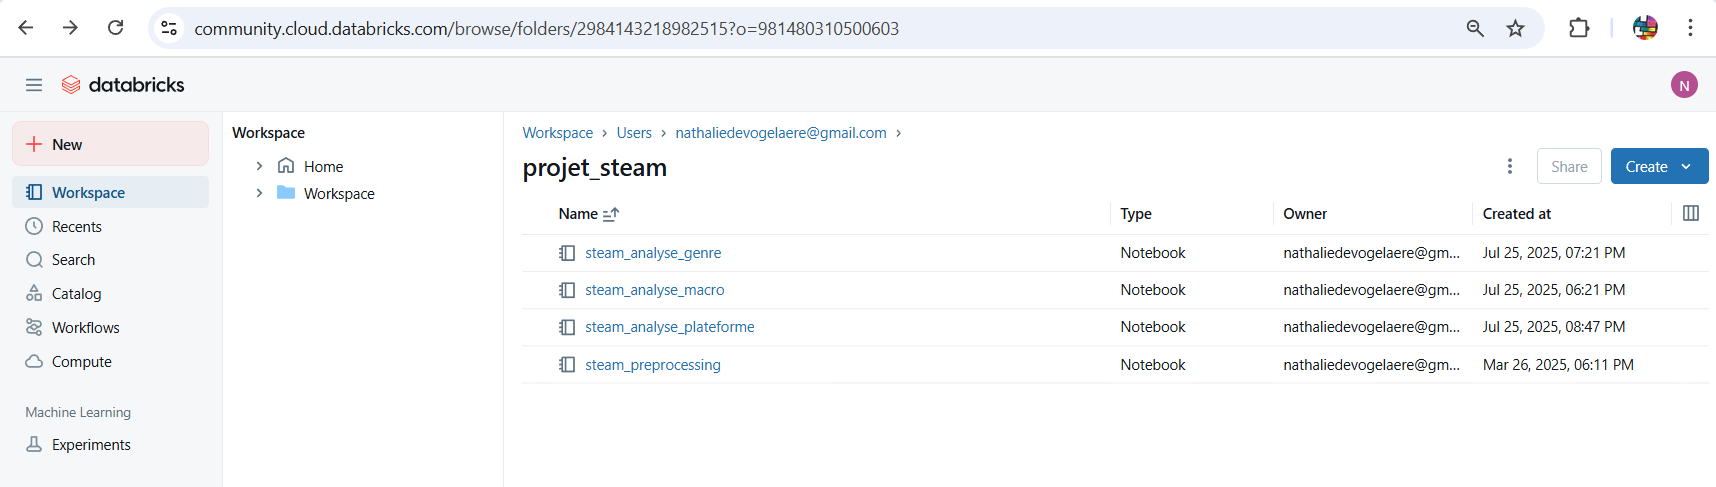